### Информация
- *Автор*: Зитцер Данил
- *Дата*: четверг, 7 октября 2021 г., 11:40:57
- *Описание*: Введение полносвязные сети и Keras

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

from IPython.display import YouTubeVideo

plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams['font.size'] = 20

warnings.filterwarnings('ignore')

## Нейронные сети

![](./../images/13-nn-application.png)

Вот так выглядит биологический нейрон головного мозга.

![](./../images/14-biological-neuron.png)

Выстроенные связи между нейронами:

![](./../images/15-complex-communication-systems.png)

[Рост отростков одного нейрона](https://youtu.be/4Gd92o4OTu0):

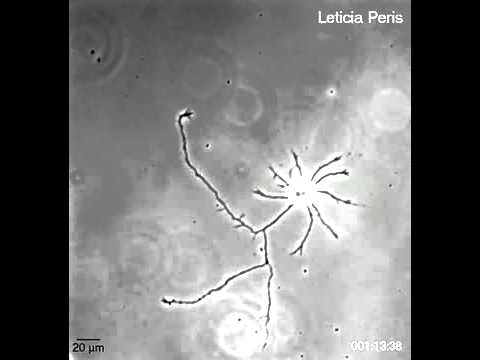

In [2]:
YouTubeVideo('4Gd92o4OTu0')

[Установление связей между нейронами](https://imgur.com/k90YFSM)

Устройство модели нейрона в сравнении с биологическим.

![](https://static.packt-cdn.com/products/9781788830645/graphics/ff29311c-b8a5-44cb-9823-92c9c8475829.png)

$$ \large y(x) = wx + b - \text{лин. ф-ия или взвешенная сумма} $$

$$ \large y(x_1, x_2, \cdots, x_n) = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b - \text{лин. ф-ия нескольких переменных} $$

#### Построение модели нейрона

Пусть у нас есть два входных признака $x_1$ и $x_2$, а также соответствующие веса $w_1$ и $w_2$ и, обязательно, смещение $b$.

In [3]:
x1, x2 = 10, 20
w1, w2, b = 0.1, 0.9, 2

Вот такой математической операцией можно представить простейшую нейронную сеть с одним нейроном.

In [4]:
x1*w1 + x2*w2 + b

21.0

$$ \large x_i - \text{признаки одного образца}$$
$$ \large w_i - \text{веса нейрона соответствующих признаков}$$

$$ \large neuron = w_1x_1 + w_2x_2 + b = \sum_{i}w_ix_i + b$$

Чтобы сделать запись более короткой можно добавить константный признак $x_3$ всегда равный 1. Тогда вес $w_3$ будет выполнять роль $b$.

In [5]:
x1, x2, x3 = 10, 20, 1
w1, w2, w3 = 0.1, 0.9, 2

In [6]:
x1*w1 + x2*w2 + x3*w3

21.0

$$ \large neuron = w_1x_1 + w_2x_2 + w_3\cdot1 = \sum_{i}w_ix_i$$

![](https://www.researchgate.net/profile/Soojun-Kim/publication/263631724/figure/fig1/AS:671522331033609@1537114808363/Biological-neuron-and-Artificial-neural-network.png)

Будем реализовывать нейронную сеть как функцию.

Входные данные

In [7]:
x1, x2, x3 = 5.0, 9.0, 1.0
w1, w2, w3 = 0.5, 0.9, 0.1

Версия 1

In [8]:
def neuron(x1: float, x2: float, x3: float, w1: float, w2: float, w3: float) -> float:
    return x1*w1 + x2*w2 + x3*w3

neuron(x1, x2, x3, w1, w2, w3)

10.7

Версия 2

In [9]:
def neuron(x: list, w: list):
    assert len(x) == len(w), 'len(x) must be equal len(w)'
    return sum([xi * wi for xi, wi in zip(x, w)])

neuron(x=[x1, x2, x3], w=[w1, w2, w3])

10.7

Можно заметить, что версия 2 очень похожа на операцию матричного умножения.

![](https://www.mathwarehouse.com/algebra/matrix/images/matrix-multiplication/how-to-multiply-2-matrices-demo.gif)

Версия 3

Через матричное умножение.

**Важно!** Чтобы количество столбцов в матрице признаков было равно количеству строк в матрице весов.

In [10]:
def neuron(x: np.ndarray, w: np.ndarray):
    assert x.shape[1] == w.shape[0], 'ncols(x) must be equal nrows(w)'
    return x @ w

neuron(np.array([[x1, x2, x3]]), np.array([[w1], [w2], [w3]]))

array([[10.7]])

Ещё раз взглянем на общую схему нейронной сети:

![](./../images/12-mlp-formula.png)

### Загрузка набора данных

In [11]:
from sklearn.datasets import load_iris

In [12]:
x, y = x, y = load_iris(return_X_y=True, as_frame=True)

In [13]:
x.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Sepal - чашелистик

Petal - лепесток

In [14]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Подготовка набора данных

In [15]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [16]:
y.sample(3)

137    2
96     1
106    2
Name: target, dtype: int64

#### One hot encoding

![](./../images/09-one-hot.png)

In [17]:
y = OneHotEncoder().fit_transform(y.values[:, None]).toarray()

y[:5, :]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

#### Масштабирование признаков

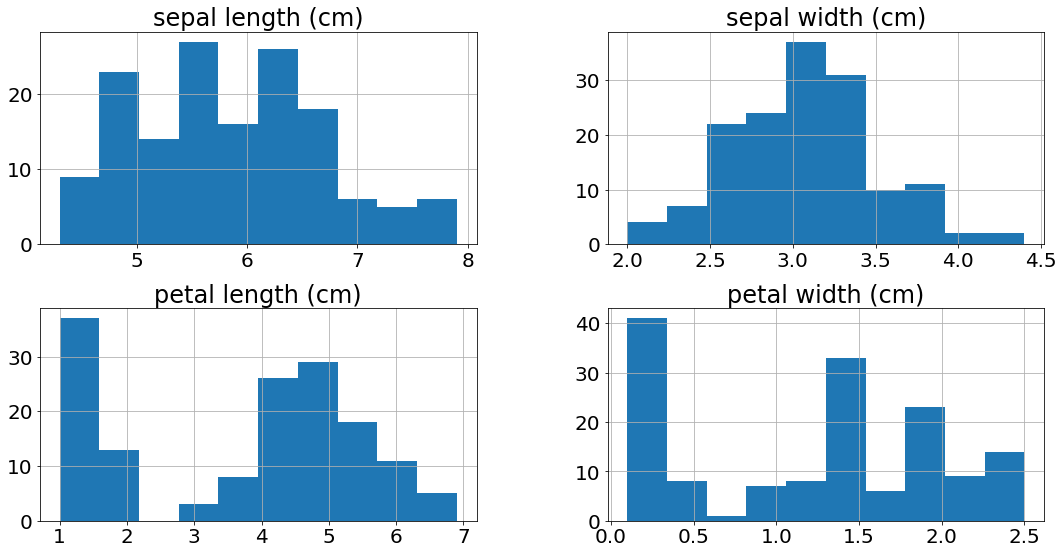

In [18]:
_ = x.hist()

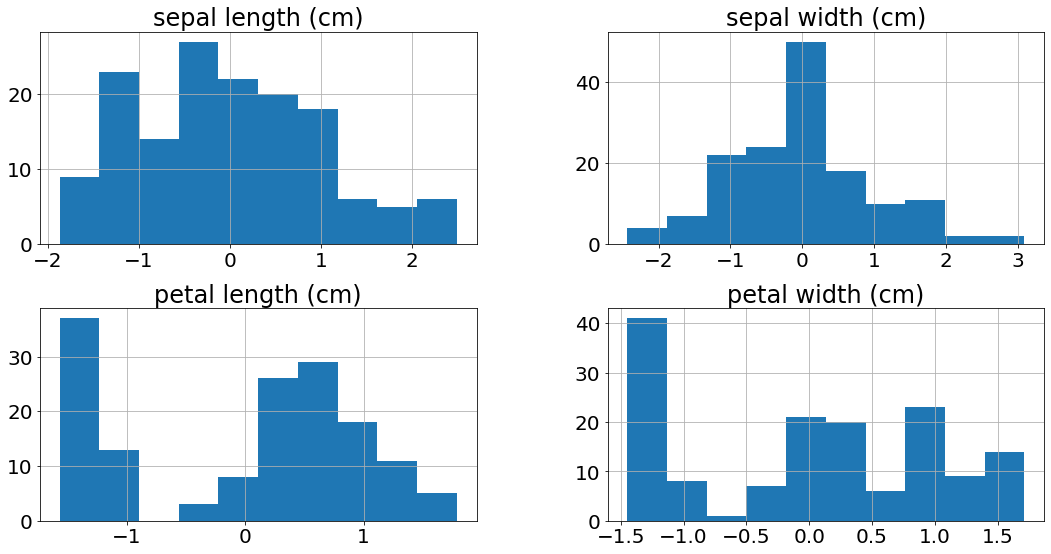

In [19]:
x_scaled = pd.DataFrame(
    data=StandardScaler().fit_transform(x),
    index=x.index,
    columns=x.columns
)

_ = x_scaled.hist()

In [20]:
print(x_scaled.shape)
print(y.shape)

(150, 4)
(150, 3)


### Обучающая и валидационная выборки

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_trn, x_vld, y_trn, y_vld = train_test_split(x_scaled, y, test_size=0.3, stratify=y)

In [23]:
print(x_trn.shape, y_trn.shape)
print(x_vld.shape, y_vld.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


### Конструирование сети 

In [24]:
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras import models
from tensorflow.keras import optimizers

![](./../images/17-nn-scheme.png)

In [25]:
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(4, )))
model.add(layers.Dense(units=6))
model.add(layers.Activation(keras.activations.relu))
model.add(layers.Dense(units=4))
model.add(layers.Activation(keras.activations.relu))
model.add(layers.Dense(units=3))
model.add(layers.Activation(keras.activations.softmax))

model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=[
        metrics.BinaryAccuracy(name='accuracy', threshold=0.5),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
activation (Activation)      (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 73
Trainable params: 73
Non-trainable params: 0
____________________________________________________________

2021-10-28 14:10:19.180454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 14:10:19.184907: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-10-28 14:10:19.185626: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-10-28 14:10:19.185981: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library

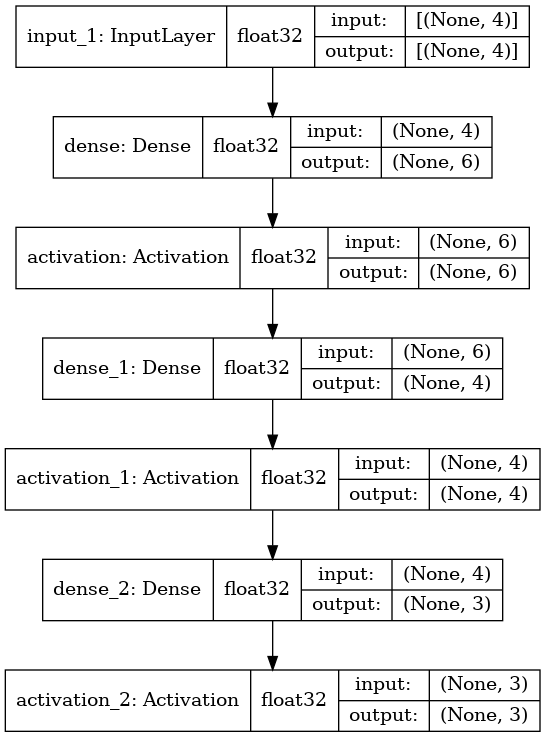

In [26]:
keras.utils.plot_model(
    model=model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True
)

Обучение сети

In [27]:
history = model.fit(
    x=x_trn,
    y=y_trn,
    batch_size=4,
    epochs=64,
    validation_data=(x_vld, y_vld),
)

2021-10-28 14:10:19.307544: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/64
27/27 [==============================] - 1s 7ms/step - loss: 1.1634 - accuracy: 0.6349 - precision: 0.2222 - recall: 0.0381 - val_loss: 1.1216 - val_accuracy: 0.6519 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/64
27/27 [==============================] - 0s 1ms/step - loss: 1.0737 - accuracy: 0.6794 - precision: 1.0000 - recall: 0.0381 - val_loss: 1.0707 - val_accuracy: 0.6593 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/64
27/27 [==============================] - 0s 1ms/step - loss: 1.0283 - accuracy: 0.6794 - precision: 1.0000 - recall: 0.0381 - val_loss: 1.0297 - val_accuracy: 0.6593 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/64
27/27 [==============================] - 0s 1ms/step - loss: 0.9811 - accuracy: 0.6857 - precision: 0.8750 - recall: 0.0667 - val_loss: 0.9872 - val_accuracy: 0.6963 - val_precision: 0.8333 - val_recall: 0.1111
Epoch 5/64
27/27 [==============================] - 0s 1ms/step - loss: 0.9295 - accurac

Epoch 38/64
27/27 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8825 - precision: 0.8696 - recall: 0.7619 - val_loss: 0.4394 - val_accuracy: 0.9037 - val_precision: 0.9211 - val_recall: 0.7778
Epoch 39/64
27/27 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8857 - precision: 0.8710 - recall: 0.7714 - val_loss: 0.4348 - val_accuracy: 0.9037 - val_precision: 0.9211 - val_recall: 0.7778
Epoch 40/64
27/27 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8889 - precision: 0.8723 - recall: 0.7810 - val_loss: 0.4304 - val_accuracy: 0.9185 - val_precision: 0.9250 - val_recall: 0.8222
Epoch 41/64
27/27 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.9016 - precision: 0.8854 - recall: 0.8095 - val_loss: 0.4258 - val_accuracy: 0.9185 - val_precision: 0.9250 - val_recall: 0.8222
Epoch 42/64
27/27 [==============================] - 0s 982us/step - loss: 0.4074 - accuracy: 0.8952 - preci

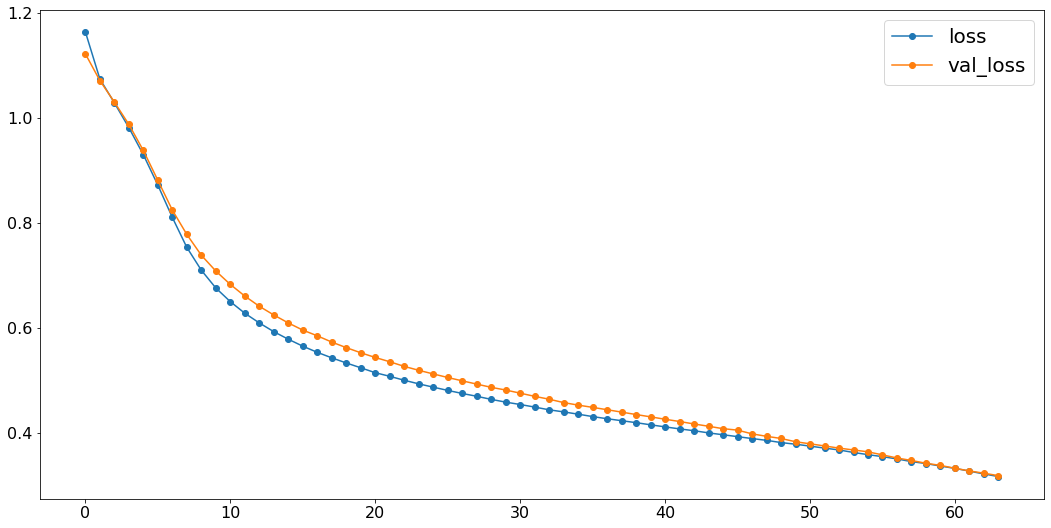

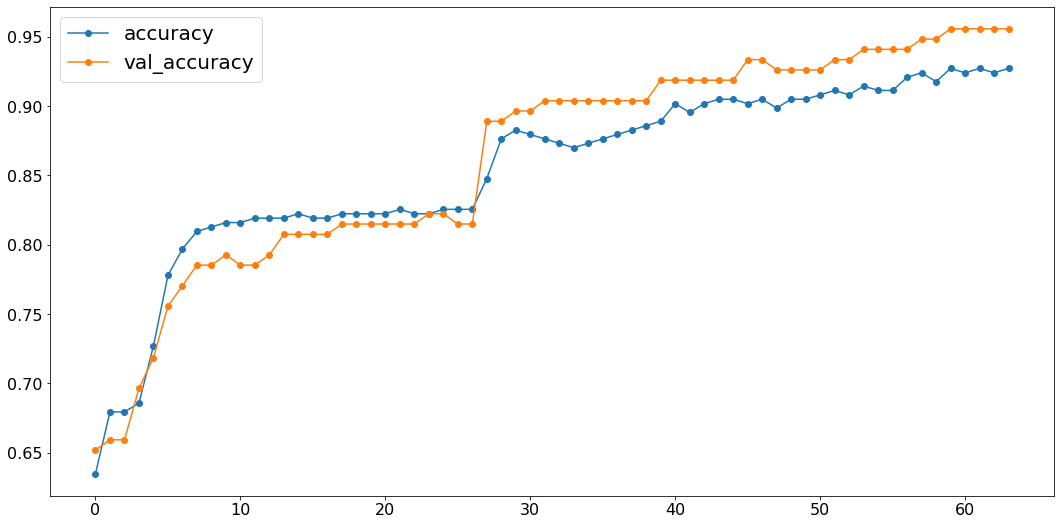

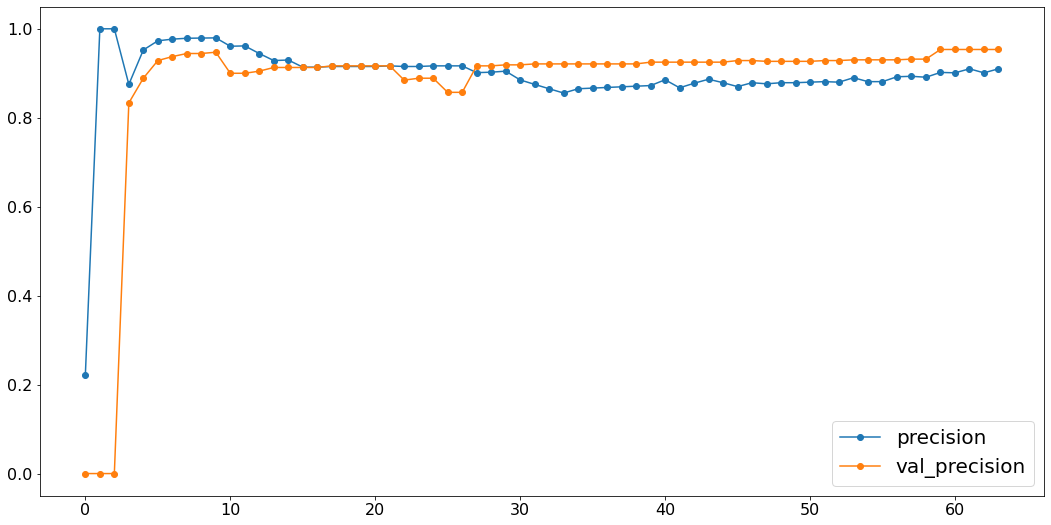

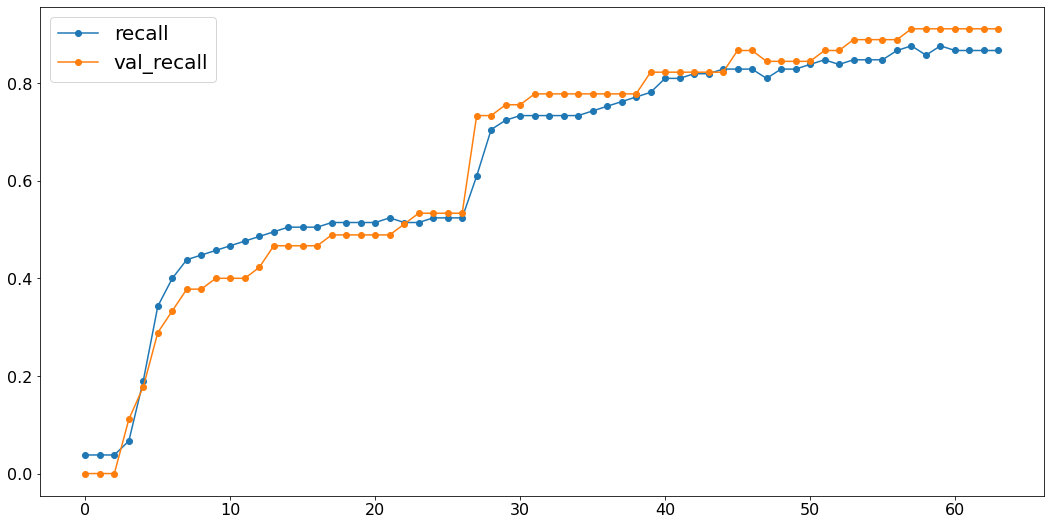

In [28]:
history_df = pd.DataFrame(history.history)

for metric in list(history.history.keys())[:4]:
    history_df[[metric, 'val_'+metric]].plot(style='-o', figsize=(18, 9), fontsize=16)